In [39]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [11]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(func.extract('month', Measurement.date) == 6).all()

In [12]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
june_temps_list

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [20]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [88]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [90]:
# June occurences for min temp 64

june_temps_df['June Temps'].value_counts(ascending=False)

76.0    194
78.0    183
77.0    176
75.0    175
74.0    169
72.0    152
73.0    145
79.0    129
71.0     97
70.0     82
80.0     65
69.0     49
81.0     32
68.0     23
67.0     10
82.0      7
65.0      3
66.0      3
83.0      2
84.0      2
64.0      1
85.0      1
Name: June Temps, dtype: int64

## D2: Determine the Summary Statistics for December

In [33]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
decem_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(func.extract('month', Measurement.date) == 12).all()

In [34]:
# 7. Convert the December temperatures to a list.
decem_temps_list = [temp.tobs for temp in decem_temps]
decem_temps_list

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [37]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
decem_temps_df = pd.DataFrame(decem_temps_list, columns=['December Temps'])
decem_temps_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [85]:
# December occurences for min temp 56

decem_temps_df['December Temps'].value_counts(ascending=False)


71.0    174
72.0    166
70.0    149
73.0    148
69.0    144
74.0    138
68.0     99
75.0     98
76.0     77
67.0     68
65.0     45
66.0     45
77.0     38
78.0     32
64.0     28
63.0     22
62.0     15
79.0      9
61.0      6
60.0      3
80.0      3
81.0      2
56.0      2
57.0      2
82.0      1
58.0      1
59.0      1
83.0      1
Name: December Temps, dtype: int64

In [36]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
decem_temps_df.describe()

,December temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [102]:
# merge June & Decemeber dataframes 
display(june_temps_df.describe(),decem_temps_df.describe())

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(0.5, 1.0, 'Temperature frequency in Ohahu Hawaii \n June')

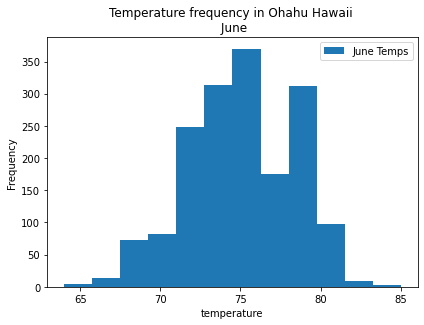

In [52]:
#create a histogram - June
june_temps_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("temperature")


plt.title('Temperature frequency in Ohahu Hawaii \n June')

Text(0.5, 1.0, 'Temperature frequency in Ohahu Hawaii \n December')

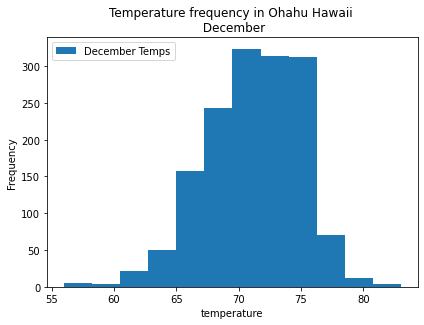

In [57]:
#create a histogram - December 
decem_temps_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("temperature")


plt.title('Temperature frequency in Ohahu Hawaii \n December')